# Probability of Recieving Seasonal Flu Vaccination Based Off Demographic

<center> 

![image](https://static.toiimg.com/thumb/msid-73905386,imgsize-719294,width-400,resizemode-4/73905386.jpg)
</center>

## Overview:

As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. The 2009 H1N1 pandemic caused between 43 million and 89 million cases of H1N1 between April 2009 and April 10, 2010. There were also between 195,000 and 403,000 H1N1-related hospitalizations during that time.

## Business Problem:

As a large pharmaceutical company, that wants to increase the likihood of someone recieving a vaccine, knowing the demographic of people who are less likely recieve a vaccine, could have some insight on who to "target".

## Data Understanding:

Our dataset is from a National 2009 H1N1 Flu Survey. 
The survey was sponsored by the CDC and the National Center for Immunization and Respiratory Diseases (NCIRD). The NHFS was conducted from October 2009 to June 2010. It was a state-based random-digit-dialed survey of over 29,000 households each month. The survey was about the swine flu, also known as the H1N1 flu. 

The dataset also has some limitations such as: 

<u><b>Missing Values:</b></u>

12,274 missing values out of 26,707, in the "health_insurance" column as well as 13,330 missing values out of 26,707 in the "employment_industry" column and 13,470 missing values from the "employment_occupation" column. 


<u><b>Coded Columns:</u></b>

The columns "hhs_geo_region", "employment_industry" and "employment_occupation" were coded and we were unable to decipher them. 

<u><b>High Coerrelation:</u></b>

From common knowledge we were able to see that the columns "health_insurance", "doctor_recc_h1n1" and "doctor_recc_seasonal" has a high correlation, considering if you don't have health insurance, you more than likely do not have a primary doctor, so having a doctor reccomondation would be impacted by health insurance. As well as the columns "education" and "income_poverty" are impacted by each other. So taking caution in choosing columns based off this knowledge.

<u><b>Bias:</u></b>

The column "race" is heavily skewed. Knowing America is 75% "white" (https://www.census.gov/quickfacts/fact/table/US/PST045222) and our data showing that 80.4% of people catergorized themselves as "white" shows us heavy bias and from that we are unable to get a clear idea of probability from different races and vaccination rates.

<u><b>Outdated:</u></b>

This survey is from 2009, while in the year 2023, we know that the Corona Virus had a huge impact on the perception of vaccines as well as behaviors like large gatherings and wearing masks, so some of these can't be translated to present day.

## Data Cleaning:

#### Importing necessary libraries, reading in data and merging datasets ###

In [283]:
# import relevant libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve
from sklearn.datasets import make_classification

In [284]:
# read in data
features = "data/training_set_features.csv"
labels = "data/training_set_labels.csv"

info = pd.read_csv(features)
vacc = pd.read_csv(labels)

In [285]:
# merge datasets
df = pd.merge(vacc, info, on = "respondent_id")

In [286]:
# taking a look at our data, 38 columns with 26,707 rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

- Based off our business understanding we will drop irrelevant and heavily biased columns.

In [287]:
# drop irrelevant columns
#columns = info.columns[[1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 30, 31, 33, 34, 35, 36, 37]]
columns = df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 26, 28, 30, 31, 33, 34, 36, 37]]
drop_columns = columns.tolist()
df = df.drop(drop_columns, axis=1)

- Checking the percentage of missing values in each column, to decide how to handle.

In [288]:
# checking percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Sorting by missing percentage in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Displaying the result
print(sorted_missing_percentage)

marital_status                 5.272026
education                      5.268282
opinion_seas_sick_from_vacc    2.010709
opinion_seas_risk              1.924589
opinion_seas_vacc_effective    1.729884
household_children             0.932340
hhs_geo_region                 0.000000
sex                            0.000000
age_group                      0.000000
seasonal_vaccine               0.000000
dtype: float64


- Considering these percentages are low, we will drop the rows with missing values.

In [289]:
# drop null values in columns
df.dropna(inplace = True)

- Renaming columns for easier understanding to domain knowledge.

In [290]:
# renaming columns
df.rename(columns={"opinion_seas_sick_from_vacc": "opinion_sick_vacc", "opinion_seas_risk": "opinion_risk", "opinion_seas_vacc_effective": "opinion_vacc_eff", "hhs_geo_region": "region", "sex": "gender", "age_group": "age", "seasonal_vaccine": "vaccine"}, inplace=True)

# sanity check
df.head(1)

,vaccine,opinion_vacc_eff,opinion_risk,opinion_sick_vacc,age,education,gender,marital_status,region,household_children
0,0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,Female,Not Married,oxchjgsf,0.0


- Creating train test split and OneHot Encoding any columns that are an object.

In [291]:
# assigning X, y values for 'vaccine' as the target column and the rest are features
X = df.drop('vaccine', axis=1)
y = df['vaccine']

# Use pd.get_dummies for one-hot encoding with drop_first
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# sanity check
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20051 entries, 3417 to 25217
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   opinion_vacc_eff            20051 non-null  float64
 1   opinion_risk                20051 non-null  float64
 2   opinion_sick_vacc           20051 non-null  float64
 3   household_children          20051 non-null  float64
 4   age_35 - 44 Years           20051 non-null  uint8  
 5   age_45 - 54 Years           20051 non-null  uint8  
 6   age_55 - 64 Years           20051 non-null  uint8  
 7   age_65+ Years               20051 non-null  uint8  
 8   education_< 12 Years        20051 non-null  uint8  
 9   education_College Graduate  20051 non-null  uint8  
 10  education_Some College      20051 non-null  uint8  
 11  gender_Male                 20051 non-null  uint8  
 12  marital_status_Not Married  20051 non-null  uint8  
 13  region_bhuqouqj             

- Creating a dummy classifier to establish a baseline for comparison with more sophisticated models.

In [292]:
# Create a DummyClassifier with the strategy of predicting the most frequent class
dummy_model = DummyClassifier(strategy="most_frequent")

# Train (fit) the DummyClassifier using the training data
dummy_model.fit(X_train, y_train)

# Use the trained dummy_model to predict the labels for the first 20 samples in the training set
dummy_predictions = dummy_model.predict(X_train)[:20]

# Print predicted labels

print(dummy_predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


- From this, we can see our baseline model shows that it is more likely for somone to <u>NOT</u> receive the seasonal vaccine.

In [293]:
# Use cross_val_score to perform cross-validation for the dummy_model
# This function evaluates the model performance using cross-validation and returns an array of scores
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)

# Display or use the cross-validation results
# The variable cv_results now contains an array of scores, one for each fold in the cross-validation
# We will inspect or use these scores for further analysis
cv_results

# Calculate the mean of the cross-validation results (cv_results)
mean_accuracy = np.mean(cv_results)

# Convert the mean accuracy to a percentage by multiplying it by 100
mean_accuracy_percentage = mean_accuracy * 100

# Print the mean accuracy as a percentage with 2 decimal places
print(f'Mean Accuracy: {mean_accuracy_percentage:.2f}%')

Mean Accuracy: 53.04%


- We can see that our baseline model has an accuracy score of <u>53%</u>. The goal is to create a model with an increased score based off our top demographics.

- The confusion matrix below visually represents how well our "Dummy Model" is performing in terms of correctly and incorrectly classified instances.

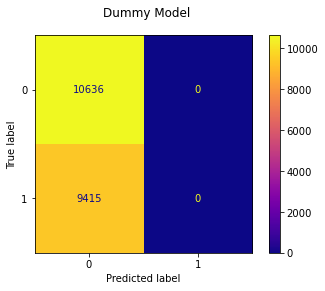

In [294]:
# Naming variable for predictions
y_pred = dummy_model.predict(X_train)

# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Create a new figure and axis for plotting
fig, ax = plt.subplots()

# Set the title for the entire figure
fig.suptitle("Dummy Model")

# Plot the confusion matrix on the specified axis (ax)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy_model.classes_)
disp.plot(ax=ax, cmap="plasma")

# Show the plot
plt.show()


- Creating a Violin chart to visual our Dummy Model accuracy.

CV Results for `dummy` model:
            0.53045 ± 0.00024 accuracy
        


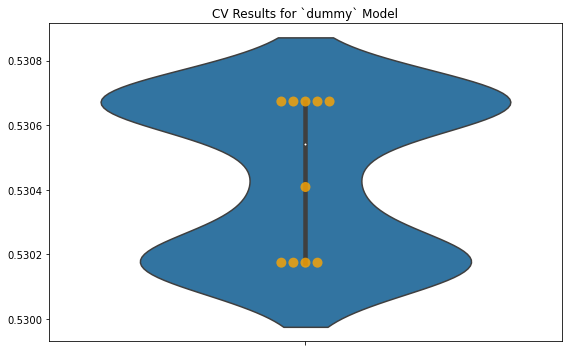

In [295]:
# helper cross validation function
class ModelWithCV():
    # Structure to save the model and more easily see its cross-validation

    def __init__(self, model, model_name, X, y, cv_now=True):
        # Initialize the model and its attributes
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        # Perform cross-validation and return results.

        # Optional: Training data to perform CV on. Otherwise use X from object
        cv_X = X if X else self.X
        # Optional: Training data to perform CV on. Otherwise use y from object
        cv_y = y if y else self.y

        # Perform cross-validation
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        # Calculate mean, median, and standard deviation of cross-validation results
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

    def print_cv_summary(self):
        # Print a summary of cross-validation results
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

    def plot_cv(self, ax):
        # Plot the cross-validation values using the array of results and given 
        # Axis for plotting.
        
        # Set the title for the plot
        ax.set_title(f'CV Results for `{self.name}` Model')
        
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        
        # Swarmplot for individual data points
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

# Create an instance of the ModelWithCV class
dummy_model_results = ModelWithCV(
                        model=dummy_model,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train
)

# Set a larger figsize for the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot cross-validation results
ax = dummy_model_results.plot_cv(ax)

# Adjust layout to prevent clipping of the plot
plt.tight_layout()

# Print a summary of cross-validation results
dummy_model_results.print_cv_summary()

# Show the plot
plt.show()

- Now creating a Logistic Regression Model to better capture more complex relationships and provide meaningful probability estimates.

In [296]:
# Create a logistic regression model with no regularization (penalty=None)
simple_logreg_model = LogisticRegression(random_state=42, penalty=None)

# Train (fit) the logistic regression model using the training data
simple_logreg_model.fit(X_train, y_train)

# Use the trained simple_logreg_model to predict the labels for the first 20 samples in the training set
predictions = simple_logreg_model.predict(X_train)[:20]

# Inspect the predicted labels
predictions

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

- The results of the Logistic Regression model with all features included, is quite better than our Dummy Model.
    Lets gather the accuracy score as well.

In [297]:
cv_results2 = cross_val_score(simple_logreg_model, X_train, y_train, cv=5)

# Display or use the cross-validation results
# The variable cv_results now contains an array of scores, one for each fold in the cross-validation
# We will inspect or use these scores for further analysis
cv_results2

# Calculate the mean of the cross-validation results (cv_results)
mean_accuracy2 = np.mean(cv_results2)

# Convert the mean accuracy to a percentage by multiplying it by 100
mean_accuracy_percentage2 = mean_accuracy2 * 100

# Print the mean accuracy as a percentage with 2 decimal places
print(f'Mean Accuracy: {mean_accuracy_percentage2:.2f}%')

Mean Accuracy: 75.07%


- As well as our Confusion Matrix has more False Positives and False Negatives.

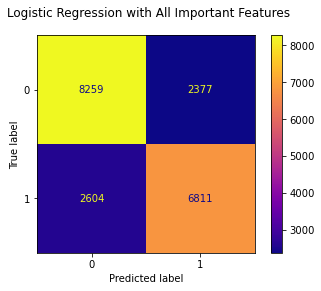

In [298]:
# Creating variables for our Logistic Regression model
y_pred = simple_logreg_model.predict(X_train)

# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Create a new figure and axis for plotting
fig, ax = plt.subplots()

# Set the title for the entire figure
fig.suptitle("Logistic Regression with All Important Features")

# Plot the confusion matrix on the specified axis (ax)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=simple_logreg_model.classes_)
disp.plot(ax=ax, cmap="plasma")

# Show the plot
plt.show()


- The AUC has increased from our Dummy Model too.

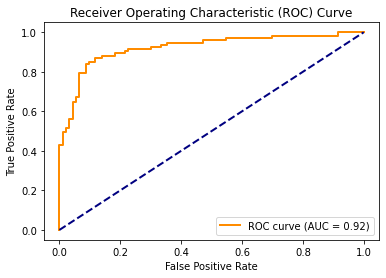

In [299]:
# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple logistic regression model
simple_logreg_model = LogisticRegression(random_state=42)
simple_logreg_model.fit(X_train, y_train)

# Compute ROC curve for the positive class
fpr, tpr, thresholds = roc_curve(y_test, simple_logreg_model.predict_proba(X_test)[:, 1])

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


- Using a Decision Tree as well as a barplot form, we visualize the features that are most important to whether or not someone receives the seasonal vaccine.

                       Feature  Importance
1                 opinion_risk    0.518694
0             opinion_vacc_eff    0.287107
7                age_65+ Years    0.140258
2            opinion_sick_vacc    0.021528
6            age_55 - 64 Years    0.017137
8         education_< 12 Years    0.012205
9   education_College Graduate    0.002776
13             region_bhuqouqj    0.000296
15             region_fpwskwrf    0.000000
20             region_oxchjgsf    0.000000
19             region_mlyzmhmf    0.000000
18             region_lzgpxyit    0.000000
17             region_lrircsnp    0.000000
16             region_kbazzjca    0.000000
11                 gender_Male    0.000000
14             region_dqpwygqj    0.000000
12  marital_status_Not Married    0.000000
10      education_Some College    0.000000
5            age_45 - 54 Years    0.000000
4            age_35 - 44 Years    0.000000
3           household_children    0.000000
21             region_qufhixun    0.000000


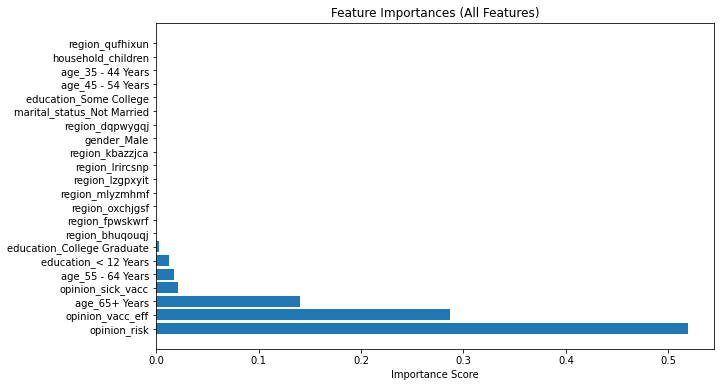

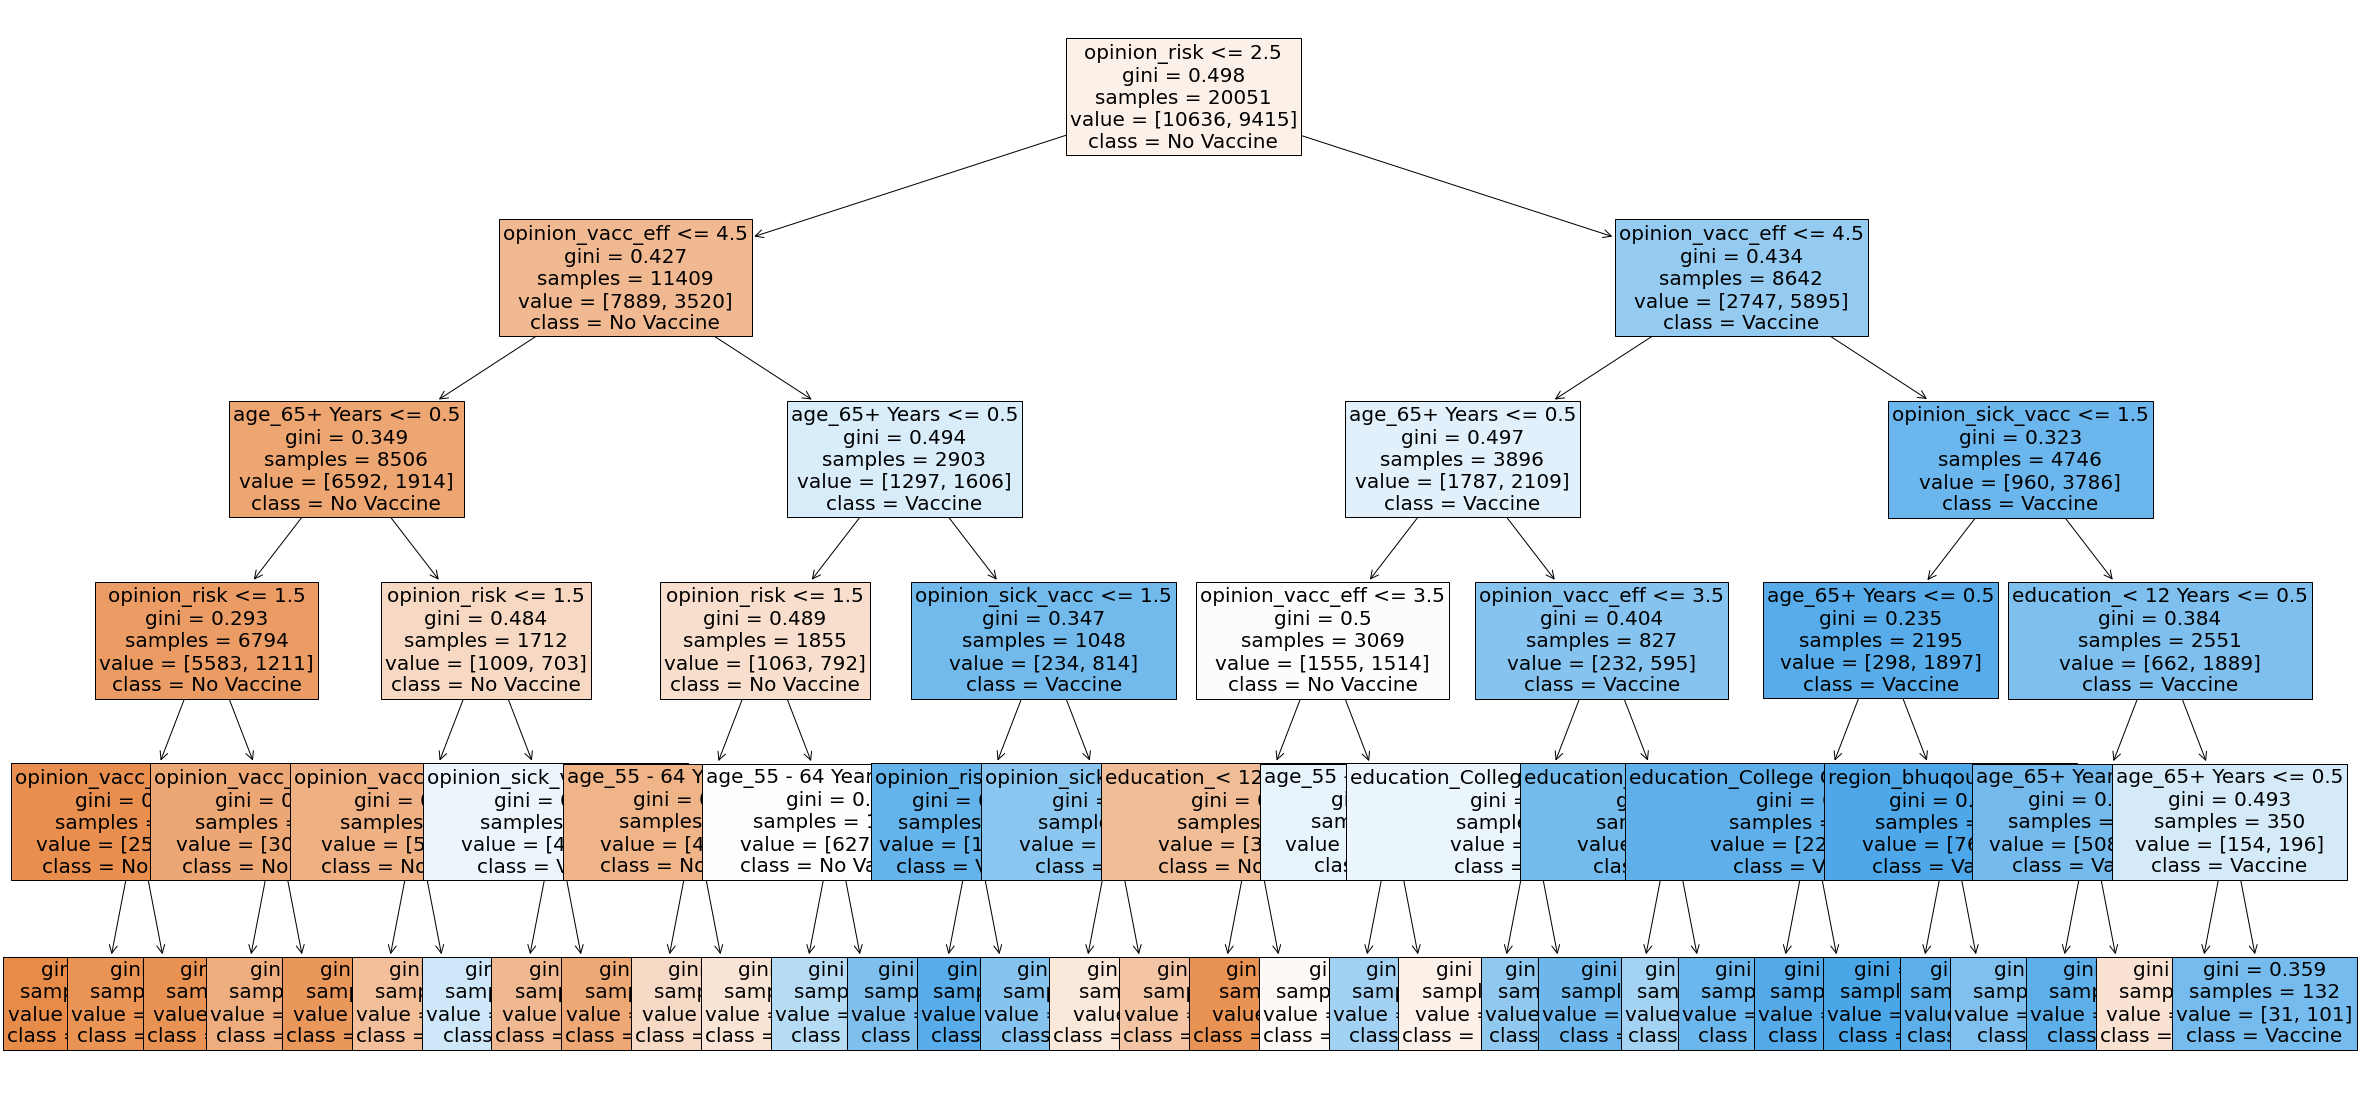

In [300]:
# assigning X, y values for 'vaccine' as the target column and the rest are features
X = df.drop('vaccine', axis=1)
y = df['vaccine']

# Use pd.get_dummies for one-hot encoding with drop_first
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Convert X_train to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_encoded.columns)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importances (All Features)')

# Plot decision tree with larger font and figure size
plt.figure(figsize=(40, 20))
plot_tree(model, filled=True, feature_names=X_train_df.columns, class_names=['No Vaccine', 'Vaccine'], fontsize=20)
plt.show()

- It appears that our top 5; is ones opinion of the risk of contracting the flu, ones opinion of how effective the vaccine is against the flu, someone aged 65 and above, ones opinion of getting sick from the vaccine and someone aged 55 - 64.

## Now we want to create a Decision Tree with a demographic that is "easily" targeted. ##
-  So we removed the opinion features.


                       Feature  Importance
3                age_65+ Years    0.614217
2            age_55 - 64 Years    0.168817
15  education_College Graduate    0.082657
13                 gender_Male    0.049137
1            age_45 - 54 Years    0.035317
17  marital_status_Not Married    0.028023
14        education_< 12 Years    0.010698
4              region_bhuqouqj    0.003799
8              region_lrircsnp    0.003629
11             region_oxchjgsf    0.001727
9              region_lzgpxyit    0.000978
6              region_fpwskwrf    0.000401
16      education_Some College    0.000388
10             region_mlyzmhmf    0.000212
12             region_qufhixun    0.000000
7              region_kbazzjca    0.000000
5              region_dqpwygqj    0.000000
0            age_35 - 44 Years    0.000000


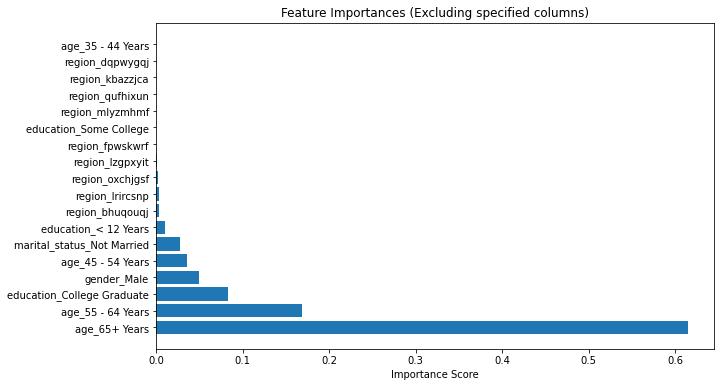

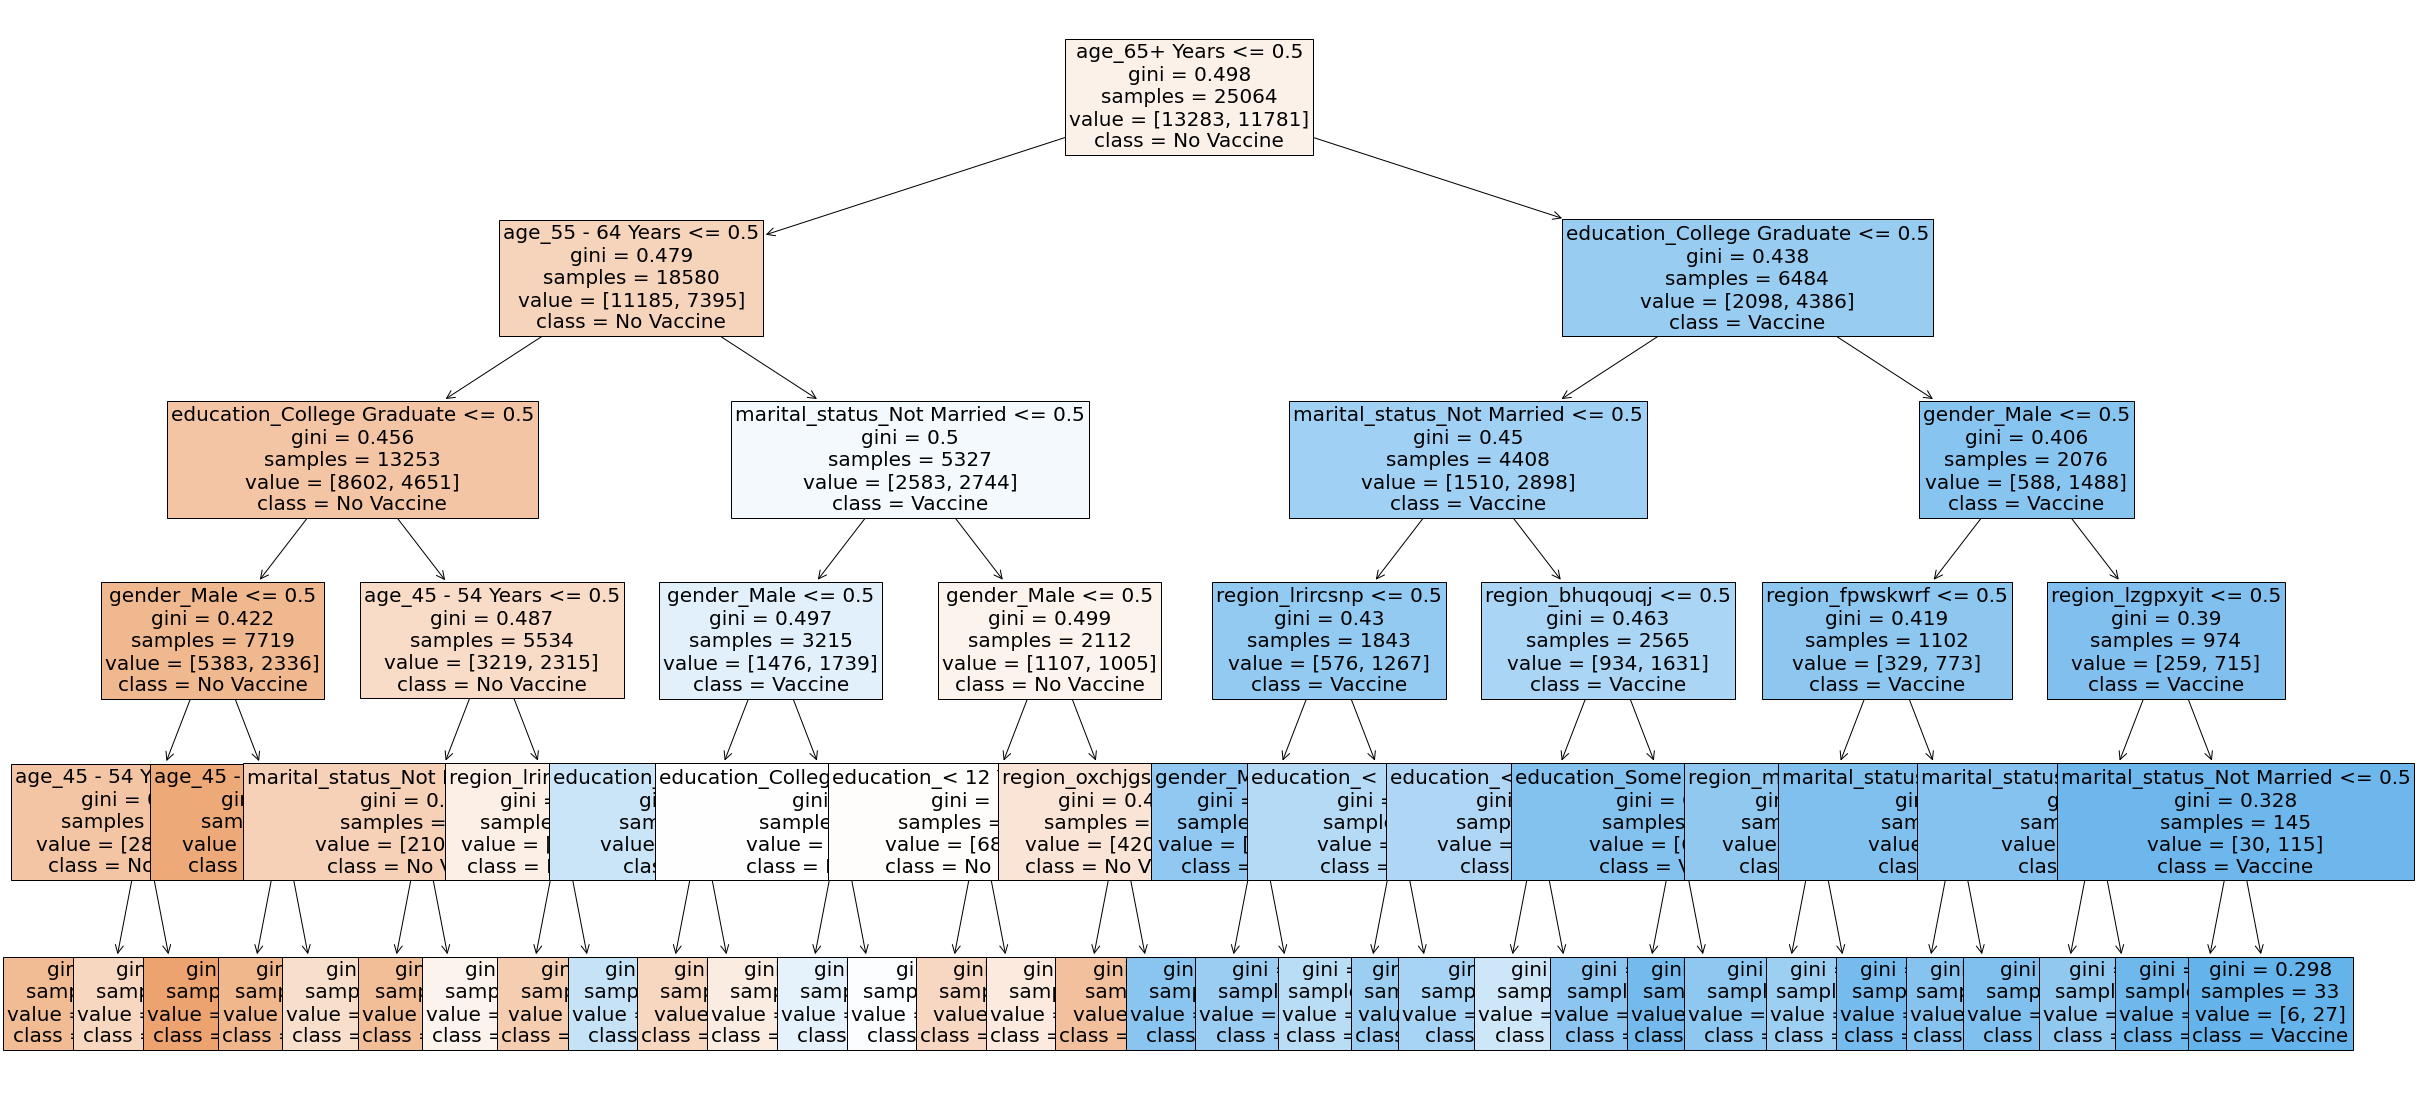

In [301]:
selected_columns = ["age", "region", "gender", "education", "marital_status"]

# Remove specified columns
columns_to_remove = ["opinion_risk", "opinion_vacc_eff", "opinion_sick_vacc"]
selected_columns = [col for col in selected_columns if col not in columns_to_remove]

# Create the new feature matrix
X_selected = df[selected_columns]
y = df['vaccine']

# Get dummy variables for categorical columns
X_selected_encoded = pd.get_dummies(X_selected, columns=["age", "region", "gender", "education", "marital_status"], drop_first=True)

# Continue with the rest of your code
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_selected_encoded, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_selected_encoded.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importances (Excluding specified columns)')

# Plot decision tree with larger font and figure size
plt.figure(figsize=(40, 20))
plot_tree(model, filled=True, feature_names=X_selected_encoded.columns, class_names=['No Vaccine', 'Vaccine'], fontsize=20)
plt.show()

- With opinion features removed, we see that the top features are "age", "education" and "gender".
- Age being 65 +
- Education being College Graduate
- Gender being Male

<b>Now we have a more clear view of what type of person is more or less likely to receive the seasonal vaccine.

- From here we will create a second dataframe that is a copy of the original. We will then test our models with the selected demographics and test if our analysis was correct by seeing if our accuracy score increases from 53%

Accuracy: 0.63
Confusion Matrix:
[[2423  862]
 [1437 1544]]


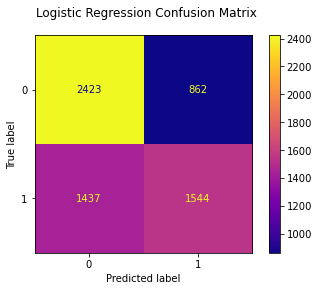

In [302]:
# Copy the dataframe
df2 = df.copy()

# Define features and target
X = df2[['age', 'education', 'gender']]
y = df2['vaccine']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a ColumnTransformer to apply one-hot encoding to specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['age', 'education', 'gender'])
    ],
    remainder='passthrough'
)

# Apply one-hot encoding to the training and test data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_encoded)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


# Train logistic regression model named logreg_model
y_pred = logreg_model.predict(X_test_encoded)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a new figure and axis for plotting
fig, ax = plt.subplots()

# Set the title for the entire figure
fig.suptitle("Logistic Regression Confusion Matrix")

# Plot the confusion matrix on the specified axis (ax)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_model.classes_)
disp.plot(ax=ax, cmap="plasma")

# Show the plot
plt.show()


- Awesome! This model shows our accuracy score has increased!

In [303]:
# Create a logistic regression model using a pipeline
logreg_model = make_pipeline(
    # Apply one-hot encoding to categorical columns and keep other columns unchanged
    ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), ['age', 'education', 'gender'])
        ],
        remainder='passthrough'
    ),
    # Logistic Regression model with a specified random state for reproducibility
    LogisticRegression(random_state=42)
)

# Perform cross-validation for the logistic regression model
logreg_cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')

# Perform cross-validation for the dummy model
dummy_cv_scores = cross_val_score(dummy_model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate mean cross-validated scores
logreg_mean_cv_score = logreg_cv_scores.mean()
dummy_mean_cv_score = dummy_cv_scores.mean()

# Convert mean scores to percentages
logreg_percentage = logreg_mean_cv_score * 100
dummy_percentage = dummy_mean_cv_score * 100

# Print the results
print(f"Logistic Regression Mean Cross-Validated Score: {logreg_percentage:.2f}%")
print(f"Dummy Model Mean Cross-Validated Score: {dummy_percentage:.2f}%")


Logistic Regression Mean Cross-Validated Score: 63.40%
Dummy Model Mean Cross-Validated Score: 53.19%


- Comparing out new Logistic Model with the selected features we see that the accuracy score has increased from our original Dummy Model by <u>10.21%</u>!

# Final Test

- Now we will run our final test on the X_test and perform Logistic Regression model.

In [304]:
# Create a logistic regression model
final_logreg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
final_logreg_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_final = final_logreg_model.predict(X_test_encoded)

# Evaluate the model performance on the test set
accuracy_final = accuracy_score(y_test, y_pred_final)

# Print or log the evaluation metrics
print(f"Final Logistic Regression Model Accuracy: {accuracy_final:.2%}")


Final Logistic Regression Model Accuracy: 63.31%


- The Final Logisitc Regression Model test has proven that the trained data is 99.8% accurate. This allows us to confirm that our selected features do in fact have an impact on vaccination rates.

- Using a Violin Plot we will graph our results for both classes of "0" being the probability of someone to not receive the vaccine and "1" being the probability of someone who does receive the vaccine.

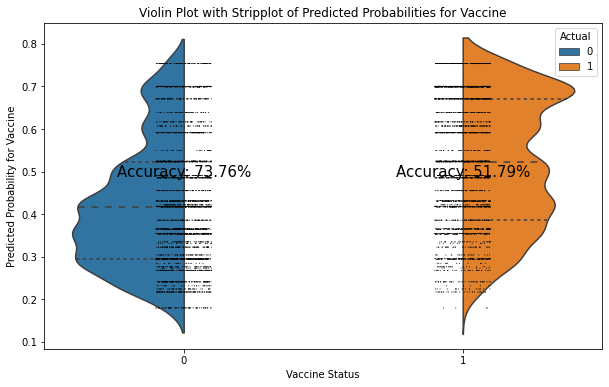

In [305]:
# Get the predicted probabilities for class 1 (vaccine)
y_prob_final = final_logreg_model.predict_proba(X_test_encoded)[:, 1]

# Create a DataFrame with the actual labels and predicted probabilities
result_df = pd.DataFrame({'Actual': y_test, 'Predicted Probability': y_prob_final})

# Create a violin plot for both classes
plt.figure(figsize=(10, 6))
sns.violinplot(x='Actual', y='Predicted Probability', data=result_df, inner='quartile', hue='Actual', split=True)
sns.stripplot(x='Actual', y='Predicted Probability', data=result_df, color='black', size=1)

# Set plot labels and title
plt.xlabel('Vaccine Status')
plt.ylabel('Predicted Probability for Vaccine')
plt.title('Violin Plot with Stripplot of Predicted Probabilities for Vaccine')

# Calculate accuracy for each class
accuracy_0 = accuracy_score(result_df[result_df['Actual'] == 0]['Actual'], (result_df[result_df['Actual'] == 0]['Predicted Probability'] > 0.5).astype(int))
accuracy_1 = accuracy_score(result_df[result_df['Actual'] == 1]['Actual'], (result_df[result_df['Actual'] == 1]['Predicted Probability'] > 0.5).astype(int))

# Annotate the plot with accuracy values
# Increased fontsize to 15
plt.text(0, 0.5, f'Accuracy: {accuracy_0:.2%}', fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(1, 0.5, f'Accuracy: {accuracy_1:.2%}', fontsize=15, horizontalalignment='center', verticalalignment='center')

# Show the plot
plt.show()

- Then combining the accuracy rate of both classes, we will confirm that the average is the same as our final Logistic Regression Model.

In [306]:
# Create a DataFrame with the actual labels and predicted labels
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_final})

# Calculate accuracy for each class
accuracy_0 = accuracy_score(result_df[result_df['Actual'] == 0]['Actual'], result_df[result_df['Actual'] == 0]['Predicted'])
accuracy_1 = accuracy_score(result_df[result_df['Actual'] == 1]['Actual'], result_df[result_df['Actual'] == 1]['Predicted'])

# Combine accuracy scores using a weighted average or any other method
combined_accuracy = (accuracy_0 * len(result_df[result_df['Actual'] == 0]) + accuracy_1 * len(result_df[result_df['Actual'] == 1])) / len(result_df)

# Print or log the combined accuracy
print(f'Combined Accuracy: {combined_accuracy:.2%}')


Combined Accuracy: 63.31%


## Great! ##
We can confirm the combined accuracy is the same as our final model!

- Now to see the probability of which classes from each feature have the lowest probability of receiving the vaccine so we are able to make recommendations.

In [314]:
# Analyze the predicted probabilities based on gender (sorted in descending order)
average_prob_by_gender = result_df.groupby('Gender')['Predicted Probability'].mean().sort_values(ascending=False)
print("Average Probability by Gender:")
print(average_prob_by_gender)

# Analyze the predicted probabilities based on age (sorted in descending order)
average_prob_by_age = result_df.groupby('Age')['Predicted Probability'].mean().sort_values(ascending=False)
print("\nAverage Probability by Age:")
print(average_prob_by_age)

# Analyze the predicted probabilities based on education (sorted in descending order)
average_prob_by_education = result_df.groupby('Education')['Predicted Probability'].mean().sort_values(ascending=False)
print("\nAverage Probability by Education:")
print(average_prob_by_education)

Average Probability by Gender:
Gender
Female    0.498242
Male      0.421035
Name: Predicted Probability, dtype: float64

Average Probability by Age:
Age
65+ Years        0.678327
55 - 64 Years    0.511225
45 - 54 Years    0.407283
35 - 44 Years    0.359851
18 - 34 Years    0.276835
Name: Predicted Probability, dtype: float64

Average Probability by Education:
Education
College Graduate    0.508078
Some College        0.452339
12 Years            0.440899
< 12 Years          0.392132
Name: Predicted Probability, dtype: float64


## From our final analysis we can see the demographic to best "target" is:

### Age:  <u>18 - 34 Years</u>
### Education: <u>Less than a High School Dipolma</u>
### Gender: <u>Male</u>

## <u>Recommendations</u>

For a company that is looking to incease vaccination rates we recommend focusing on:
- Younger groups of people (18 - 34)
- Early stages of education 
- Men more than women

## <u>Future Insights

- How has COVID changed seasonal flu behavior?
- Why do certain groups get vaccinated less?
- Perform a more comprehensive survey